In [1]:
import time
import random
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
x_data = np.loadtxt('x_data.txt', dtype=int)
y_data = np.loadtxt('y_data.txt', dtype=int)

np.shape(x_data)

(75000, 160)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
size = np.shape(x_data)[1]

In [4]:
model = Sequential()
model.add(Dense(160, input_shape=(size,), activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(120, activation = "softmax"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               25760     
                                                                 
 dense_1 (Dense)             (None, 64)                10304     
                                                                 
 dense_2 (Dense)             (None, 120)               7800      
                                                                 
Total params: 43,864
Trainable params: 43,864
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
1899/1899 [==============================] - 4s 2ms/step - loss: 4.1436 - accuracy: 0.0468 - val_loss: 4.1032 - val_accuracy: 0.0529
Epoch 2/100
1899/1899 [==============================] - 4s 2ms/step - loss: 4.0390 - accuracy: 0.0602 - val_loss: 3.9550 - val_accuracy: 0.0644
Epoch 3/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.9016 - accuracy: 0.0695 - val_loss: 3.8534 - val_accuracy: 0.0698
Epoch 4/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.8292 - accuracy: 0.0735 - val_loss: 3.8189 - val_accuracy: 0.0716
Epoch 5/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.8160 - accuracy: 0.0724 - val_loss: 3.8124 - val_accuracy: 0.0692
Epoch 6/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.8108 - accuracy: 0.0727 - val_loss: 3.8254 - val_accuracy: 0.0699
Epoch 7/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.8130 - accuracy: 0.0734 - val_loss: 3.8120 - val_ac

1899/1899 [==============================] - 4s 2ms/step - loss: 3.8186 - accuracy: 0.0721 - val_loss: 3.9758 - val_accuracy: 0.0671
Epoch 58/100
1899/1899 [==============================] - 3s 2ms/step - loss: 3.8533 - accuracy: 0.0720 - val_loss: 3.8716 - val_accuracy: 0.0661
Epoch 59/100
1899/1899 [==============================] - 4s 2ms/step - loss: 3.8311 - accuracy: 0.0721 - val_loss: 3.8345 - val_accuracy: 0.0690
Epoch 60/100
1899/1899 [==============================] - 3s 2ms/step - loss: 3.8372 - accuracy: 0.0740 - val_loss: 3.8272 - val_accuracy: 0.0686
Epoch 61/100
1899/1899 [==============================] - 3s 2ms/step - loss: 3.8747 - accuracy: 0.0712 - val_loss: 4.0020 - val_accuracy: 0.0616
Epoch 62/100
1899/1899 [==============================] - 3s 2ms/step - loss: 3.8435 - accuracy: 0.0727 - val_loss: 3.8610 - val_accuracy: 0.0717
Epoch 63/100
1899/1899 [==============================] - 3s 2ms/step - loss: 3.9023 - accuracy: 0.0702 - val_loss: 3.9357 - val_accuracy

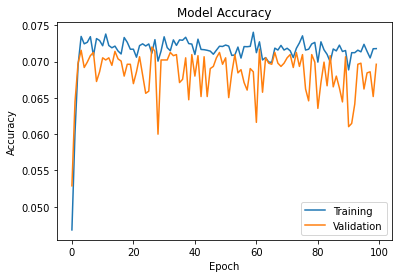

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [14]:
arr = np.empty(np.shape(y_data)[0], dtype=int)
for i in range(np.shape(y_data)[0]):
    for j in range(120):
        if(y_data[i][j] == 1):
            arr[i] = j

array([117,  83,  14, ...,  45,  20,  36])